# Importing Necessary Library

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
import zipfile
import matplotlib.pyplot as plt
import math
import os
import seaborn as sns

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Data preparation

In [20]:
data_paths = {
    "test": {
        "Daging Ayam Ras": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/test/Daging Ayam Ras.csv",
        "Daging Sapi Murni": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/test/Daging Sapi Murni.csv",
        "Telur Ayam Ras": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/test/Telur Ayam Ras.csv",
        "Cabai Rawit Merah": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/test/Cabai Rawit Merah.csv",
        "Gula Konsumsi": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/test/Gula Konsumsi.csv",
        "Beras Premium": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/test/Beras Premium.csv",
        "Tepung Terigu (Curah)": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/test/Tepung Terigu (Curah).csv",
        "Beras Medium": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/test/Beras Medium.csv",
        "Minyak Goreng Curah": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/test/Minyak Goreng Curah.csv",
        "Bawang Merah": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/test/Bawang Merah.csv",
        "Minyak Goreng Kemasan Sederhana": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/test/Minyak Goreng Kemasan Sederhana.csv",
        "Bawang Putih Bonggol": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/test/Bawang Putih Bonggol.csv",
        "Cabai Merah Keriting": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/test/Cabai Merah Keriting.csv"
    },
    "train": {
        "Daging Ayam Ras": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/train/Daging Ayam Ras.csv",
        "Daging Sapi Murni": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/train/Daging Sapi Murni.csv",
        "Telur Ayam Ras": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/train/Telur Ayam Ras.csv",
        "Cabai Rawit Merah": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/train/Cabai Rawit Merah.csv",
        "Gula Konsumsi": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/train/Gula Konsumsi.csv",
        "Beras Premium": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/train/Beras Premium.csv",
        "Tepung Terigu (Curah)": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/train/Tepung Terigu (Curah).csv",
        "Beras Medium": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/train/Beras Medium.csv",
        "Minyak Goreng Curah": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/train/Minyak Goreng Curah.csv",
        "Bawang Merah": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/train/Bawang Merah.csv",
        "Minyak Goreng Kemasan Sederhana": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/train/Minyak Goreng Kemasan Sederhana.csv",
        "Bawang Putih Bonggol": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/train/Bawang Putih Bonggol.csv",
        "Cabai Merah Keriting": "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan/train/Cabai Merah Keriting.csv"
    }
}


In [21]:
# Test data
test_daging_ayam_ras = pd.read_csv(data_paths["test"]["Daging Ayam Ras"])
test_daging_sapi_murni = pd.read_csv(data_paths["test"]["Daging Sapi Murni"])
test_telur_ayam_ras = pd.read_csv(data_paths["test"]["Telur Ayam Ras"])
test_cabai_rawit_merah = pd.read_csv(data_paths["test"]["Cabai Rawit Merah"])
test_gula_konsumsi = pd.read_csv(data_paths["test"]["Gula Konsumsi"])
test_beras_premium = pd.read_csv(data_paths["test"]["Beras Premium"])
test_tepung_terigu_curah = pd.read_csv(data_paths["test"]["Tepung Terigu (Curah)"])
test_beras_medium = pd.read_csv(data_paths["test"]["Beras Medium"])
test_minyak_goreng_curah = pd.read_csv(data_paths["test"]["Minyak Goreng Curah"])
test_bawang_merah = pd.read_csv(data_paths["test"]["Bawang Merah"])
test_minyak_goreng_kemasan_sederhana = pd.read_csv(data_paths["test"]["Minyak Goreng Kemasan Sederhana"])
test_bawang_putih_bonggol = pd.read_csv(data_paths["test"]["Bawang Putih Bonggol"])
test_cabai_merah_keriting = pd.read_csv(data_paths["test"]["Cabai Merah Keriting"])

# Train data
train_daging_ayam_ras = pd.read_csv(data_paths["train"]["Daging Ayam Ras"])
train_daging_sapi_murni = pd.read_csv(data_paths["train"]["Daging Sapi Murni"])
train_telur_ayam_ras = pd.read_csv(data_paths["train"]["Telur Ayam Ras"])
train_cabai_rawit_merah = pd.read_csv(data_paths["train"]["Cabai Rawit Merah"])
train_gula_konsumsi = pd.read_csv(data_paths["train"]["Gula Konsumsi"])
train_beras_premium = pd.read_csv(data_paths["train"]["Beras Premium"])
train_tepung_terigu_curah = pd.read_csv(data_paths["train"]["Tepung Terigu (Curah)"])
train_beras_medium = pd.read_csv(data_paths["train"]["Beras Medium"])
train_minyak_goreng_curah = pd.read_csv(data_paths["train"]["Minyak Goreng Curah"])
train_bawang_merah = pd.read_csv(data_paths["train"]["Bawang Merah"])
train_minyak_goreng_kemasan_sederhana = pd.read_csv(data_paths["train"]["Minyak Goreng Kemasan Sederhana"])
train_bawang_putih_bonggol = pd.read_csv(data_paths["train"]["Bawang Putih Bonggol"])
train_cabai_merah_keriting = pd.read_csv(data_paths["train"]["Cabai Merah Keriting"])



## Combining Train for easier EDA

In [22]:
# Dictionary containing commodity names and their respective train DataFrames
train_commodities = {
    "Daging Ayam Ras": train_daging_ayam_ras,
    "Daging Sapi Murni": train_daging_sapi_murni,
    "Telur Ayam Ras": train_telur_ayam_ras,
    "Cabai Rawit Merah": train_cabai_rawit_merah,
    "Gula Konsumsi": train_gula_konsumsi,
    "Beras Premium": train_beras_premium,
    "Tepung Terigu Curah": train_tepung_terigu_curah,
    "Beras Medium": train_beras_medium,
    "Minyak Goreng Curah": train_minyak_goreng_curah,
    "Bawang Merah": train_bawang_merah,
    "Minyak Goreng Kemasan Sederhana": train_minyak_goreng_kemasan_sederhana,
    "Bawang Putih Bonggol": train_bawang_putih_bonggol,
    "Cabai Merah Keriting": train_cabai_merah_keriting,
}

# Initialize an empty list to store DataFrames
commodity_dfs = []

# Process each commodity
for name, df in train_commodities.items():
    df = df.copy()
    df = df.melt(id_vars=["Date"], var_name="Wilayah", value_name=name)  # Reshape data
    commodity_dfs.append(df)

# Merge all data on Date and Wilayah
combined_train_df = commodity_dfs[0]
for df in commodity_dfs[1:]:
    combined_train_df = combined_train_df.merge(df, on=["Date", "Wilayah"], how="outer")


# EDA

## Basic Data Info

In [23]:
# Display first few rows
combined_train_df.head()

,Date,Wilayah,Daging Ayam Ras,Daging Sapi Murni,Telur Ayam Ras,Cabai Rawit Merah,Gula Konsumsi,Beras Premium,Tepung Terigu Curah,Beras Medium,Minyak Goreng Curah,Bawang Merah,Minyak Goreng Kemasan Sederhana,Bawang Putih Bonggol,Cabai Merah Keriting
0,2022-01-01,Aceh,30540.0,150930.0,27550.0,NaN,13520.0,12080.0,8910.0,11030.0,NaN,28970.0,19400.0,27440.0,22360.0
1,2022-01-01,Bali,38390.0,112770.0,26010.0,76680.0,12670.0,11500.0,9000.0,10290.0,NaN,20870.0,19690.0,22390.0,40000.0
2,2022-01-01,Banten,37610.0,124900.0,30480.0,80020.0,13240.0,11210.0,9090.0,9960.0,NaN,26890.0,18820.0,27240.0,39240.0
3,2022-01-01,Bengkulu,39680.0,124090.0,26370.0,43040.0,13280.0,11350.0,8190.0,10100.0,NaN,26650.0,18540.0,25960.0,24860.0
4,2022-01-01,DI Yogyakarta,36180.0,124880.0,28990.0,63490.0,12590.0,11250.0,8150.0,9650.0,NaN,25240.0,19580.0,24940.0,39350.0


In [24]:
# Display first few rows
combined_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34136 entries, 0 to 34135
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             34136 non-null  object 
 1   Wilayah                          34136 non-null  object 
 2   Daging Ayam Ras                  32895 non-null  float64
 3   Daging Sapi Murni                32891 non-null  float64
 4   Telur Ayam Ras                   32895 non-null  float64
 5   Cabai Rawit Merah                32101 non-null  float64
 6   Gula Konsumsi                    32895 non-null  float64
 7   Beras Premium                    32895 non-null  float64
 8   Tepung Terigu Curah              32894 non-null  float64
 9   Beras Medium                     32895 non-null  float64
 10  Minyak Goreng Curah              28699 non-null  float64
 11  Bawang Merah                     32895 non-null  float64
 12  Minyak Goreng Kema

In [25]:
combined_train_df.isnull().sum()

Date                                  0
Wilayah                               0
Daging Ayam Ras                    1241
Daging Sapi Murni                  1245
Telur Ayam Ras                     1241
Cabai Rawit Merah                  2035
Gula Konsumsi                      1241
Beras Premium                      1241
Tepung Terigu Curah                1242
Beras Medium                       1241
Minyak Goreng Curah                5437
Bawang Merah                       1241
Minyak Goreng Kemasan Sederhana    1289
Bawang Putih Bonggol               1241
Cabai Merah Keriting               1244
dtype: int64

In [26]:
combined_train_df.duplicated().sum()

0

In [27]:
combined_train_df.describe()

,Daging Ayam Ras,Daging Sapi Murni,Telur Ayam Ras,Cabai Rawit Merah,Gula Konsumsi,Beras Premium,Tepung Terigu Curah,Beras Medium,Minyak Goreng Curah,Bawang Merah,Minyak Goreng Kemasan Sederhana,Bawang Putih Bonggol,Cabai Merah Keriting
count,32895.000000,32891.000000,32895.000000,32101.000000,32895.000000,32895.000000,32894.000000,32895.000000,28699.000000,32895.00000,32847.000000,32895.000000,32892.000000
mean,37212.982216,136376.815238,29373.962912,57319.523691,15737.745250,14179.411765,10761.840761,12399.020520,15421.046378,36557.44338,18742.518038,35151.879921,48723.424541
std,5909.623589,12634.701832,3946.218239,19227.107518,1737.667656,1868.977899,1136.388543,1551.386493,1675.468555,10004.91217,2859.499898,7836.923623,16040.381948
min,23000.000000,98300.000000,18910.000000,14000.000000,11760.000000,10060.000000,7480.000000,9100.000000,11000.000000,14810.00000,14000.000000,18480.000000,16380.000000
25%,32750.000000,128735.000000,26820.000000,42440.000000,14360.000000,12560.000000,10080.000000,11100.000000,14280.000000,29830.00000,16810.000000,29070.000000,36280.000000
50%,36270.000000,135240.000000,28720.000000,55480.000000,15140.000000,14330.000000,10710.000000,12560.000000,15050.000000,35210.00000,17910.000000,35470.000000,46675.000000
75%,41590.000000,145380.000000,31460.000000,70000.000000,17260.000000,15470.000000,11430.000000,13440.000000,16170.000000,41690.00000,19910.000000,39930.000000,59632.500000
max,59160.000000,180000.000000,53150.000000,167210.000000,21450.000000,20000.000000,16430.000000,17000.000000,27000.000000,85520.00000,35970.000000,66050.000000,127910.000000


In [28]:
combined_train_df["Date"].min(), combined_train_df["Date"].max()

('2022-01-01', '2024-09-30')

# Combining Trend for visualization

In [29]:
# Base directory
base_dir = "/kaggle/input/comodity-price-prediction-penyisihan-arkavidia-9/Google Trend"

# Dictionary to store trends
trends_data = {}

# Loop through each commodity folder
for commodity in os.listdir(base_dir):
    commodity_path = os.path.join(base_dir, commodity)
    
    if os.path.isdir(commodity_path):  # Ensure it's a folder
        trends_data[commodity] = {}
        
        # Loop through each CSV file (representing a region or national trend)
        for file in os.listdir(commodity_path):
            if file.endswith(".csv"):
                region = file.replace(".csv", "")  # Extract region name
                file_path = os.path.join(commodity_path, file)
                
                # Read the CSV file
                df = pd.read_csv(file_path)
                
                # Store in dictionary: trends_data[commodity][region] = DataFrame
                trends_data[commodity][region] = df

In [30]:
def append_trend_data(price_df, commodity_name, trends_data):
    """
    Merges price dataset with regional and national Google Trends data, 
    maintaining the wide format.
    
    Parameters:
    - price_df: Pandas DataFrame where columns represent provinces and values are prices.
    - commodity_name: The commodity name to match with trends_data.
    - trends_data: Dictionary containing Google Trends data per commodity and region.
    
    Returns:
    - DataFrame with Google Trends data appended as new columns.
    """
    if commodity_name not in trends_data:
        print(f"No trend data found for {commodity_name}")
        return price_df

    # Ensure date is in datetime format
    price_df["Date"] = pd.to_datetime(price_df["Date"])

    # Get province names from column headers (excluding "Date")
    province_names = [col for col in price_df.columns if col != "Date"]

    # Merge regional trends
    for province in province_names:
        if province in trends_data[commodity_name]:  # Check if trend data exists
            trend_df = trends_data[commodity_name][province].copy()
            trend_df["Date"] = pd.to_datetime(trend_df["Date"])  # Ensure datetime format
            
            # Merge trend data for this specific province
            price_df = price_df.merge(trend_df, on="Date", how="left", suffixes=("", f"_trend_{province}"))

    # Merge national trends (assuming "Indonesia" is the key for national trends)
    if "Indonesia" in trends_data[commodity_name]:  
        national_trend_df = trends_data[commodity_name]["Indonesia"].copy()
        national_trend_df["Date"] = pd.to_datetime(national_trend_df["Date"])
        
        price_df = price_df.merge(national_trend_df, on="Date", how="left", suffixes=("", "_trend_national"))
    
    return price_df

In [31]:
# List of training datasets
train_datasets = [
    train_daging_ayam_ras, train_daging_sapi_murni, train_telur_ayam_ras,
    train_cabai_rawit_merah, train_gula_konsumsi, train_beras_premium,
    train_tepung_terigu_curah, train_beras_medium, train_minyak_goreng_curah,
    train_bawang_merah, train_minyak_goreng_kemasan_sederhana,
    train_bawang_putih_bonggol, train_cabai_merah_keriting
]

# Standardize trend column names for all datasets
train_datasets = [df.rename(columns=lambda col: col.replace(f"{col.split('_trend_')[0]}_trend_", "trend_") if "_trend_" in col else col) for df in train_datasets]

# Unpack the modified datasets back to variables
(
    train_daging_ayam_ras, train_daging_sapi_murni, train_telur_ayam_ras,
    train_cabai_rawit_merah, train_gula_konsumsi, train_beras_premium,
    train_tepung_terigu_curah, train_beras_medium, train_minyak_goreng_curah,
    train_bawang_merah, train_minyak_goreng_kemasan_sederhana,
    train_bawang_putih_bonggol, train_cabai_merah_keriting
) = train_datasets

In [32]:
train_daging_ayam_ras = append_trend_data(train_daging_ayam_ras, "daging ayam", trends_data)
train_daging_sapi_murni = append_trend_data(train_daging_sapi_murni, "daging sapi", trends_data)
train_telur_ayam_ras = append_trend_data(train_telur_ayam_ras, "telur ayam", trends_data)
train_cabai_rawit_merah = append_trend_data(train_cabai_rawit_merah, "cabai rawit", trends_data)
train_gula_konsumsi = append_trend_data(train_gula_konsumsi, "gula", trends_data)
train_beras_premium = append_trend_data(train_beras_premium, "beras", trends_data)
train_tepung_terigu_curah = append_trend_data(train_tepung_terigu_curah, "tepung terigu", trends_data)
train_beras_medium = append_trend_data(train_beras_medium, "beras", trends_data)
train_minyak_goreng_curah = append_trend_data(train_minyak_goreng_curah, "minyak goreng", trends_data)
train_bawang_merah = append_trend_data(train_bawang_merah, "bawang merah", trends_data)
train_minyak_goreng_kemasan_sederhana = append_trend_data(train_minyak_goreng_kemasan_sederhana, "minyak goreng", trends_data)
train_bawang_putih_bonggol = append_trend_data(train_bawang_putih_bonggol, "bawang putih", trends_data)
train_cabai_merah_keriting = append_trend_data(train_cabai_merah_keriting, "cabai merah", trends_data)

In [33]:
train_daging_ayam_ras.columns

Index(['Date', 'Aceh', 'Bali', 'Banten', 'Bengkulu', 'DI Yogyakarta',
       'DKI Jakarta', 'Gorontalo', 'Jambi', 'Jawa Barat', 'Jawa Tengah',
       'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan',
       'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara',
       'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Lampung',
       'Maluku Utara', 'Maluku', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur',
       'Papua Barat', 'Papua', 'Riau', 'Sulawesi Barat', 'Sulawesi Selatan',
       'Sulawesi Tengah', 'Sulawesi Tenggara', 'Sulawesi Utara',
       'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara', 'daging ayam',
       'daging ayam_trend_Bali', 'daging ayam_trend_Banten',
       'daging ayam_trend_Bengkulu', 'daging ayam_trend_DI Yogyakarta',
       'daging ayam_trend_DKI Jakarta', 'daging ayam_trend_Gorontalo',
       'daging ayam_trend_Jambi', 'daging ayam_trend_Jawa Barat',
       'daging ayam_trend_Jawa Tengah', 'daging ayam_trend_Jawa Timur',
       'daging ayam_

## Corr Matrix for Trend Data and Train Data (DKI Jakarta)

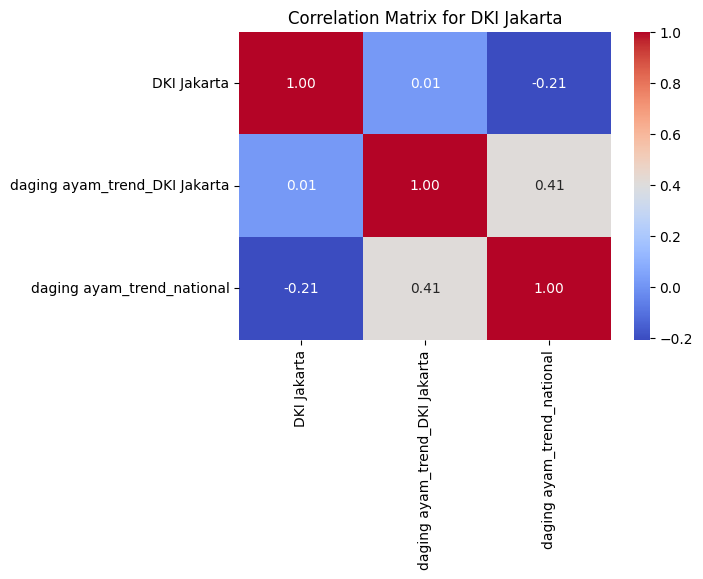

In [34]:
# Selecting relevant columns
selected_columns = ['DKI Jakarta', 'daging ayam_trend_DKI Jakarta', 'daging ayam_trend_national']
correlation_matrix = train_daging_ayam_ras[selected_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for DKI Jakarta")
plt.show()

# best way to deal with missing data

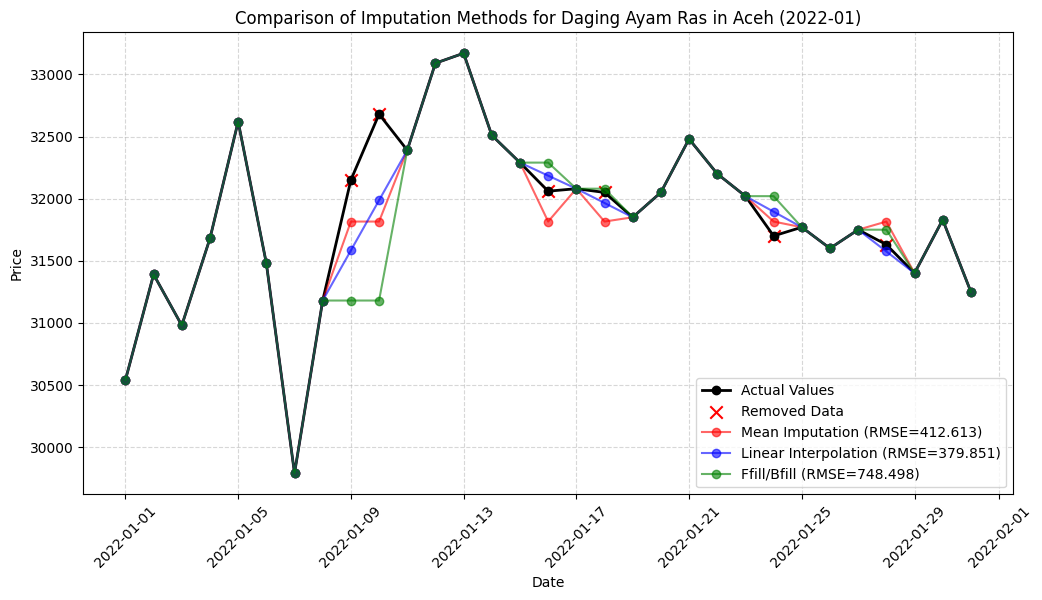

In [35]:
# Ensure 'Date' is in datetime format
combined_train_df['Date'] = pd.to_datetime(combined_train_df['Date'])

# Choose a commodity and region
commodity = "Daging Ayam Ras"
wilayah = combined_train_df['Wilayah'].mode()[0]  # Select most common region
df_sample = combined_train_df[combined_train_df['Wilayah'] == wilayah].copy()

# Find a month with no missing values
df_sample = df_sample.sort_values('Date')
df_sample['Month'] = df_sample['Date'].dt.to_period('M')
month_without_missing = df_sample.groupby('Month')[commodity].apply(lambda x: x.notna().all())

# Select first fully available month
selected_month = month_without_missing[month_without_missing].index[0]
df_selected = df_sample[df_sample['Month'] == selected_month].copy()

# Backup original values for comparison
df_actual = df_selected.copy()

# Artificially remove 20% of values
np.random.seed(42)
mask = np.random.choice(df_selected.index, size=int(0.2 * len(df_selected)), replace=False)
df_selected.loc[mask, commodity] = np.nan

# Apply Different Imputation Methods
df_mean = df_selected.copy()
df_mean[commodity] = df_mean[commodity].fillna(df_mean[commodity].mean())

df_linear = df_selected.copy()
df_linear[commodity] = df_linear[commodity].interpolate(method='linear')

df_ffill_bfill = df_selected.copy()
df_ffill_bfill[commodity] = df_ffill_bfill[commodity].fillna(method='ffill').fillna(method='bfill')

# Calculate RMSE for comparison
rmse_mean = np.sqrt(mean_squared_error(df_actual.loc[mask, commodity], df_mean.loc[mask, commodity]))
rmse_linear = np.sqrt(mean_squared_error(df_actual.loc[mask, commodity], df_linear.loc[mask, commodity]))
rmse_ffill_bfill = np.sqrt(mean_squared_error(df_actual.loc[mask, commodity], df_ffill_bfill.loc[mask, commodity]))

# Plot Comparison
plt.figure(figsize=(12, 6))

# Actual Data (Bold Black)
plt.plot(df_actual['Date'], df_actual[commodity], 'o-', color='black', linewidth=2, label='Actual Values')

# Missing Points (Red X)
plt.scatter(df_selected.loc[mask, 'Date'], df_actual.loc[mask, commodity], color='red', marker='x', s=80, label='Removed Data')

# Imputed Data
plt.plot(df_mean['Date'], df_mean[commodity], 'o-', color='red', alpha=0.6, label=f'Mean Imputation (RMSE={rmse_mean:.3f})')
plt.plot(df_linear['Date'], df_linear[commodity], 'o-', color='blue', alpha=0.6, label=f'Linear Interpolation (RMSE={rmse_linear:.3f})')
plt.plot(df_ffill_bfill['Date'], df_ffill_bfill[commodity], 'o-', color='green', alpha=0.6, label=f'Ffill/Bfill (RMSE={rmse_ffill_bfill:.3f})')

plt.title(f"Comparison of Imputation Methods for {commodity} in {wilayah} ({selected_month})")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


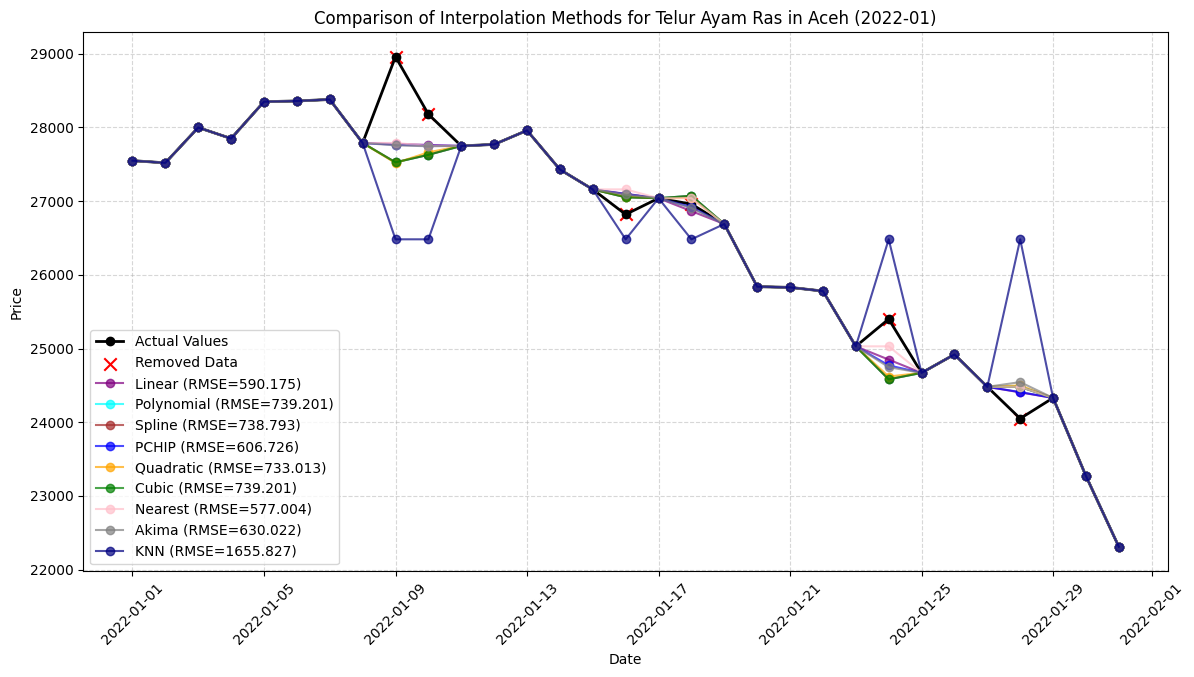

In [36]:
# Ensure 'Date' is in datetime format
combined_train_df['Date'] = pd.to_datetime(combined_train_df['Date'])

# Choose a commodity and the most common region
commodity = "Telur Ayam Ras"
wilayah = combined_train_df['Wilayah'].mode()[0]  # Select most common region
df_sample = combined_train_df[combined_train_df['Wilayah'] == wilayah].copy()

# Sort by Date and find months with no missing values
df_sample = df_sample.sort_values('Date')
df_sample['Month'] = df_sample['Date'].dt.to_period('M')
month_without_missing = df_sample.groupby('Month')[commodity].apply(lambda x: x.notna().all())

# Select first fully available month
selected_month = month_without_missing[month_without_missing].index[0]
df_selected = df_sample[df_sample['Month'] == selected_month].copy()

# Backup actual values for later comparison
df_actual = df_selected.copy()

# Artificially remove 20% of values to simulate missing data
np.random.seed(42)
mask = np.random.choice(df_selected.index, size=int(0.2 * len(df_selected)), replace=False)
df_selected.loc[mask, commodity] = np.nan

df_linear = df_selected.copy()
df_linear[commodity] = df_selected[commodity].interpolate(method='linear')

df_poly = df_selected.copy()
df_poly[commodity] = df_selected[commodity].interpolate(method='polynomial', order=3)

df_spline = df_selected.copy()
df_spline[commodity] = df_selected[commodity].interpolate(method='spline', order=3)

df_pchip = df_selected.copy()
df_pchip[commodity] = df_selected[commodity].interpolate(method='pchip')

df_quadratic = df_selected.copy()
df_quadratic[commodity] = df_selected[commodity].interpolate(method='quadratic')

df_cubic = df_selected.copy()
df_cubic[commodity] = df_selected[commodity].interpolate(method='cubic')

df_nearest = df_selected.copy()
df_nearest[commodity] = df_selected[commodity].interpolate(method='nearest')

df_akima = df_selected.copy()
df_akima[commodity] = df_selected[commodity].interpolate(method='akima')

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = df_selected.copy()
df_knn[commodity] = knn_imputer.fit_transform(df_knn[[commodity]])

# Compute RMSE for each method
methods = {
    'Linear': df_linear,
    'Polynomial': df_poly,
    'Spline': df_spline,
    'PCHIP': df_pchip,
    'Quadratic': df_quadratic,
    'Cubic': df_cubic,
    'Nearest': df_nearest,
    'Akima': df_akima,
    'KNN': df_knn,
}

rmse_values = {method: np.sqrt(mean_squared_error(df_actual.loc[mask, commodity], df_imputed.loc[mask, commodity])) 
               for method, df_imputed in methods.items()}

# Plot Comparison
plt.figure(figsize=(14, 7))

# Actual Data (Bold Black Line)
plt.plot(df_actual['Date'], df_actual[commodity], 'o-', color='black', linewidth=2, label='Actual Values')

# Missing Points (Red X)
plt.scatter(df_selected.loc[mask, 'Date'], df_actual.loc[mask, commodity], color='red', marker='x', s=80, label='Removed Data')

# Plot each method
colors = ['purple', 'cyan', 'brown', 'blue', 'orange', 'green', 'pink', 'grey', 'navy', 'magenta', 'lime', 'gold']
for (method, df_imputed), color in zip(methods.items(), colors):
    plt.plot(df_imputed['Date'], df_imputed[commodity], 'o-', color=color, alpha=0.7, label=f"{method} (RMSE={rmse_values[method]:.3f})")

# Customize plot
plt.title(f"Comparison of Interpolation Methods for {commodity} in {wilayah} ({selected_month})")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


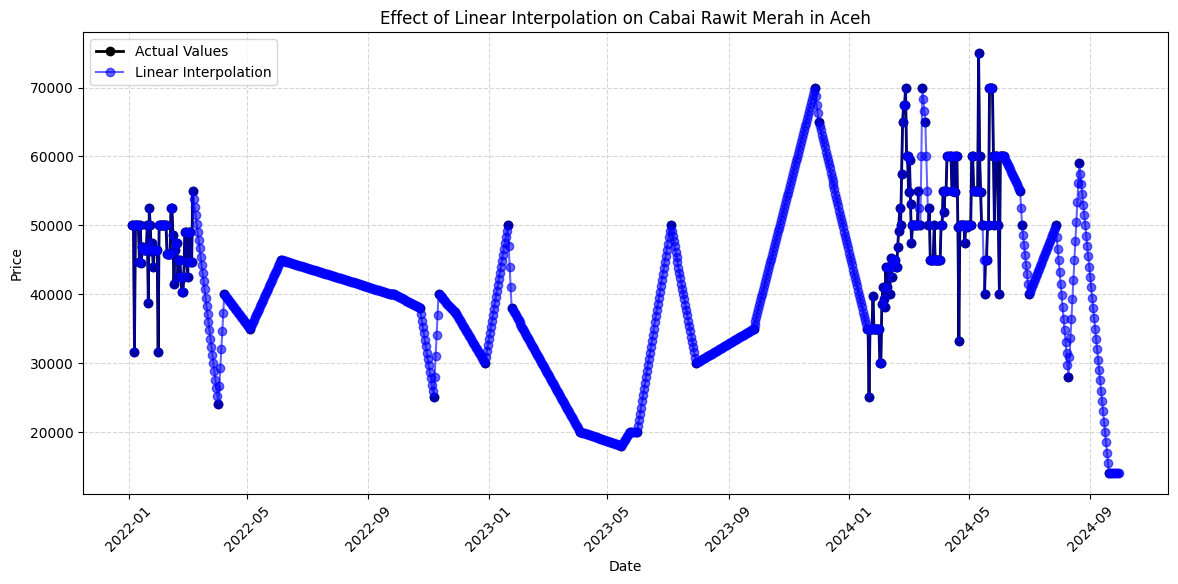

In [37]:
# Ensure 'Date' is in datetime format
combined_train_df['Date'] = pd.to_datetime(combined_train_df['Date'])

# Select commodity and region
commodity = "Cabai Rawit Merah"
wilayah = "Aceh"

# Filter data for the selected commodity and region
df_sample = combined_train_df[(combined_train_df['Wilayah'] == wilayah)].copy()

# Sort by date
df_sample = df_sample.sort_values('Date')

# Backup original values for comparison
df_actual = df_sample.copy()

# Apply Linear Interpolation
df_linear = df_sample.copy()
df_linear[commodity] = df_linear[commodity].interpolate(method='linear')

# Plot comparison
plt.figure(figsize=(14, 6))

# Original Data (Black Line)
plt.plot(df_actual['Date'], df_actual[commodity], 'o-', color='black', linewidth=2, label='Actual Values')

# Interpolated Data (Blue Line)
plt.plot(df_linear['Date'], df_linear[commodity], 'o-', color='blue', alpha=0.6, label='Linear Interpolation')

# Customize plot
plt.title(f"Effect of Linear Interpolation on {commodity} in {wilayah}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Define Data Preprocessing Functions

In [38]:
# Function to fill missing data
def fill_missing_data(df):
    return df.interpolate(method='linear', limit_direction='both')

# Function to filter dataset
def filter_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    return df


# Training Function

In [39]:
def train_best_model(train_df, commodity_name):
    train_df = filter_data(fill_missing_data(train_df))
    train_df['Timestamp'] = train_df['Date'].astype(int) // 10**9  # Convert date to timestamp
    X = train_df[['Timestamp']]
    y = train_df.drop(columns=['Date', 'Timestamp'])
    best_models = {}
    best_models_per_region = {}
    model_counts = {name: 0 for name in ["ET"] + [f"KNN_{k}" for k in range(1, 31)]}
    high_mape_regions = []
    
    print(f"\nCommodity: {commodity_name}")  
    print("-" * 40)
    
    # Store all learning curve data for grid plotting
    learning_curve_data = {}
    
    for region in y.columns:
        X_train, X_valid, y_train, y_valid = train_test_split(X, y[region], test_size=0.2, random_state=42)
        best_model_name, best_model, best_mape = None, None, float('inf')
        best_et_estimators = None  # Track the best n_estimators value
        mape_scores_knn = []
        mape_scores_et = []
        
        # Try KNN with different neighbors
        for k in range(1, 31):
            model = KNeighborsRegressor(n_neighbors=k)
            mape = -np.mean(cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=5))
            mape_scores_knn.append((k, mape))  # Store MAPE for this k
            if mape < best_mape:
                best_mape = mape
                best_model = model
                best_model_name = f"KNN_{k}"
        
        # Try ExtraTrees Regressor with different n_estimators from 1 to 400 with steps of 25
        et_mape_per_estimator = []
        for n_trees in range(1, 401, 25):  # From 1 to 400 with step 25
            et_model = ExtraTreesRegressor(n_estimators=n_trees, random_state=69)
            et_mape = -np.mean(cross_val_score(et_model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=5))
            et_mape_per_estimator.append((n_trees, et_mape))  # Store MAPE per number of trees
            if et_mape < best_mape:
                best_mape = et_mape
                best_model = ExtraTreesRegressor(n_estimators=n_trees, random_state=69)  # Create fresh model with best n_estimators
                best_model_name = "ET"
                best_et_estimators = n_trees  # Save the optimal n_estimators value
        
        # Final training of the best model
        best_model.fit(X_train, y_train)
        best_models[region] = best_model
        best_models_per_region[region] = best_model_name
        model_counts[best_model_name] += 1
        
        # Print the best model and MAPE for this region
        if best_model_name == "ET":
            print(f"Region: {region} | Best Model: {best_model_name} | Optimal n_estimators: {best_et_estimators} | Lowest MAPE: {best_mape:.4f}")
        else:
            print(f"Region: {region} | Best Model: {best_model_name} | Lowest MAPE: {best_mape:.4f}")
            
        if best_mape > 0.01:
            high_mape_regions.append((region, best_mape))
        
        # Store learning curve data for this region
        learning_curve_data[region] = {
            'knn_data': mape_scores_knn,
            'et_data': et_mape_per_estimator,
            'best_model': best_model_name,
            'best_mape': best_mape,
            'best_et_estimators': best_et_estimators
        }
    
    # Plot learning curves in a grid
    num_regions = len(y.columns)
    cols = min(3, num_regions)  # Maximum 3 columns
    rows = math.ceil(num_regions / cols) * 2  # Two rows per region (one for KNN, one for ET)
    
    fig = plt.figure(figsize=(15, rows * 3))
    fig.suptitle(f"Learning Curves for {commodity_name}", fontsize=16)
    
    plot_idx = 1
    for region in y.columns:
        data = learning_curve_data[region]
        
        # Plot KNN curve
        plt.subplot(rows, cols, plot_idx)
        k_values, knn_mape_values = zip(*data['knn_data'])
        plt.plot(k_values, knn_mape_values, marker="o", linestyle="-", label="KNN MAPE")
        if data['best_model'].startswith('KNN'):
            best_k = int(data['best_model'].split('_')[1])
            plt.axvline(x=best_k, color='red', linestyle='--', 
                      label=f'Best k={best_k}, MAPE={data["best_mape"]:.4f}')
        plt.xlabel("Number of Neighbors (k)")
        plt.ylabel("MAPE (%)")
        plt.title(f"KNN Learning Curve - {region}")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        
        # Plot ExtraTrees curve
        plot_idx += 1
        plt.subplot(rows, cols, plot_idx)
        tree_counts, et_mape_values = zip(*data['et_data'])
        plt.plot(tree_counts, et_mape_values, marker="o", linestyle="-", color="green", label="ExtraTrees MAPE")
        if data['best_model'] == "ET":
            plt.axvline(x=data['best_et_estimators'], color='red', linestyle='--', 
                       label=f'Best n={data["best_et_estimators"]}, MAPE={data["best_mape"]:.4f}')
        plt.xlabel("Number of Trees (n_estimators)")
        plt.ylabel("MAPE (%)")
        plt.title(f"ExtraTrees Learning Curve - {region}")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        
        plot_idx += 1
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the main title
    
    # Create a directory for the figures if it doesn't exist 
    os.makedirs("mape_visualizations", exist_ok=True)
    # Save the figure 
    plt.savefig(f"mape_visualizations/{commodity_name}_learning_curves.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    if high_mape_regions:
        print("\nRegions with MAPE > 0.01:")
        for region, mape in high_mape_regions:
            print(f"- {region}: {mape:.4f}")
    
    return best_models, best_models_per_region, model_counts

# Prediction Function

In [40]:
# Function to make predictions
def predict_prices(models, best_models_per_region, test_df):
    test_df = filter_data(fill_missing_data(test_df))
    test_df['Timestamp'] = test_df['Date'].astype(int) // 10**9
    X_test = test_df[['Timestamp']]
    predictions = {region: models[region].predict(X_test) for region in best_models_per_region}
    
    return predictions, test_df['Date']

# Function to create the submission file
def create_submission(predictions, dates, commodity_name):
    submission = [
        [f'{commodity_name}/{region}/{date.date()}', price]
        for region, preds in predictions.items()
        for date, price in zip(dates, preds)
    ]
    return pd.DataFrame(submission, columns=['id', 'price'])

# Running for All Commodities

In [ ]:
# List of commodities
commodities = [
    "Daging Ayam Ras", "Daging Sapi Murni", "Telur Ayam Ras", "Cabai Rawit Merah",
    "Gula Konsumsi", "Beras Premium", "Tepung Terigu (Curah)", "Beras Medium",
    "Minyak Goreng Curah", "Bawang Merah", "Minyak Goreng Kemasan Sederhana",
    "Bawang Putih Bonggol", "Cabai Merah Keriting"
]

all_submissions = []
total_model_counts = {name: 0 for name in ["ET"] + [f"KNN_{k}" for k in range(1, 31)]}
for commodity in commodities:
    train_df = pd.read_csv(data_paths['train'][commodity])
    test_df = pd.read_csv(data_paths['test'][commodity])
    models, best_models_per_region, model_counts = train_best_model(train_df, commodity)
    predictions, dates = predict_prices(models, best_models_per_region, test_df)
    submission_df = create_submission(predictions, dates, commodity)
    all_submissions.append(submission_df)
    # Update the total model counts
    for model_name, count in model_counts.items():
        total_model_counts[model_name] += count


Commodity: Daging Ayam Ras
----------------------------------------
Region: Aceh | Best Model: ET | Optimal n_estimators: 351 | Lowest MAPE: 0.0072
Region: Bali | Best Model: ET | Optimal n_estimators: 26 | Lowest MAPE: 0.0064
Region: Banten | Best Model: KNN_4 | Lowest MAPE: 0.0102
Region: Bengkulu | Best Model: ET | Optimal n_estimators: 376 | Lowest MAPE: 0.0080
Region: DI Yogyakarta | Best Model: ET | Optimal n_estimators: 276 | Lowest MAPE: 0.0082
Region: DKI Jakarta | Best Model: ET | Optimal n_estimators: 276 | Lowest MAPE: 0.0123
Region: Gorontalo | Best Model: ET | Optimal n_estimators: 151 | Lowest MAPE: 0.0067
Region: Jambi | Best Model: ET | Optimal n_estimators: 376 | Lowest MAPE: 0.0067
Region: Jawa Barat | Best Model: ET | Optimal n_estimators: 276 | Lowest MAPE: 0.0054
Region: Jawa Tengah | Best Model: ET | Optimal n_estimators: 351 | Lowest MAPE: 0.0050
Region: Jawa Timur | Best Model: ET | Optimal n_estimators: 351 | Lowest MAPE: 0.0056
Region: Kalimantan Barat | Bes

# Create Submission File

In [ ]:
final_submission = pd.concat(all_submissions)

# Save final submission file
final_submission.to_csv('submission.csv', index=False)

# Print total model usage summary
print("\nTotal model usage across all regions and commodities:")
for model_name, count in total_model_counts.items():
    print(f"{model_name}: {count} times")

final_submission